# preprocessing 1

In [95]:
import pandas as pd
import numpy as np

In [96]:
data = pd.read_csv('movie_metadata.csv')

In [97]:
data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [98]:
data.shape

(5043, 28)

In [99]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

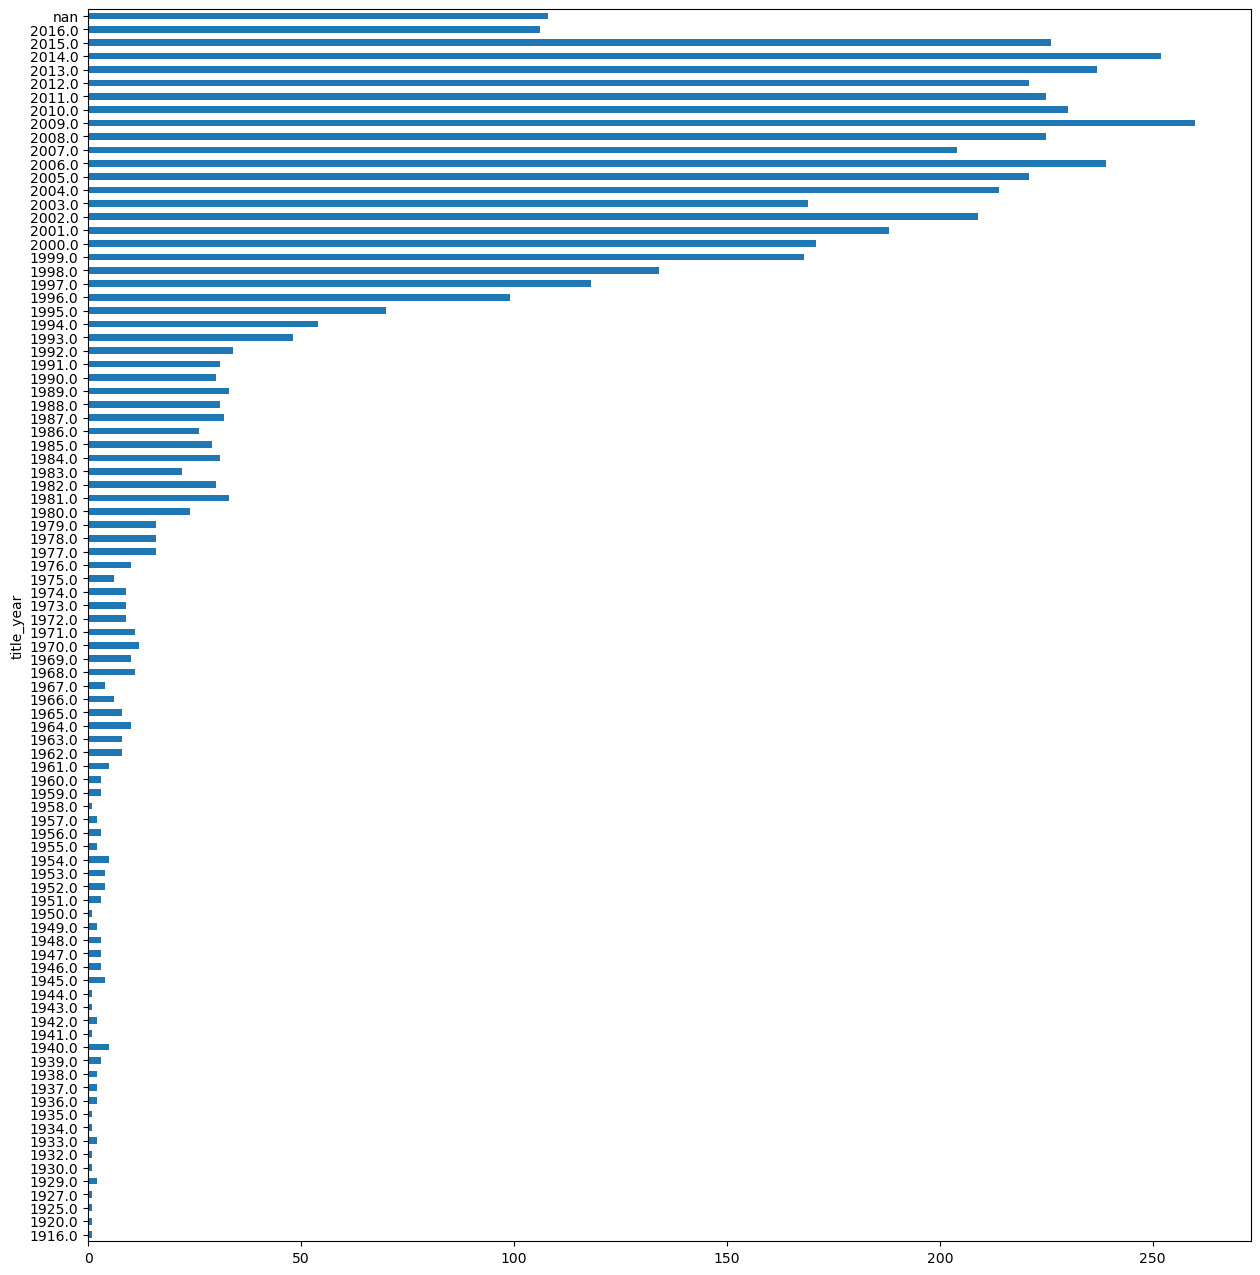

In [100]:
# we have movies only upto 2016
import matplotlib.pyplot as plt
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

recommendation will be based on these features only

In [101]:
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [102]:
data.head(10)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,Spider-Man 3
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,Tangled
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,Avengers: Age of Ultron
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince


In [103]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [104]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling


In [105]:
data['genres'] = data['genres'].str.replace('|', ' ')

In [106]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,Shanghai Calling


In [107]:
data['movie_title'] = data['movie_title'].str.lower()

In [108]:
# null terminating char at the end
data['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

In [109]:
# removing the null terminating char at the end
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1])

In [110]:
data['movie_title'][1]

"pirates of the caribbean: at world's end"

In [111]:
data.to_csv('data.csv',index=False)

# preprocessing 2

In [112]:
import numpy as np
import pandas as pd

In [113]:
credits = pd.read_csv('credits.csv')

In [114]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', '...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a3...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', ...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a92514...","[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', '...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah' Jackson"", 'credit_id': ...","[{'credit_id': '52fe44779251416c91011acb', 'department': 'Directing', '...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251...","[{'credit_id': '52fe44959251416c75039ed7', 'department': 'Sound', 'gend...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': '5894a909925141427e0079a5...","[{'credit_id': '5894a97d925141426c00818c', 'department': 'Directing', '...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela', 'credit_id': '52fe4af1...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'department': 'Directing', '...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'credit_id': '52fe4776c3a368...","[{'credit_id': '52fe4776c3a368484e0c8387', 'department': 'Directing', '...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': '52fe4ea59251416c7515d7d5...","[{'credit_id': '533bccebc3a36844cf0011a7', 'department': 'Directing', '...",227506


In [115]:
meta = pd.read_csv('movies_metadata.csv')

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\2048473160.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('movies_metadata.csv')


In [116]:
meta.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915Lf...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': ...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthda...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [117]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')

In [118]:
meta['year'] = meta['release_date'].dt.year

In [119]:
meta['year'].value_counts().sort_index()

year
1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: count, Length: 135, dtype: int64

 Getting only 2017 movies as we already have movies up to the year 2016 in preprocessing 1 file. 

In [120]:
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [121]:
new_meta

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0


In [122]:
new_meta['id'] = new_meta['id'].astype(int)

In [123]:
data = pd.merge(new_meta, credits, on='id')

In [124]:
pd.set_option('display.max_colwidth', 75)
data

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', '..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'ge..."
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gend..."
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gend..."


In [125]:
# evaluates an expression node or a string containing a Python literal or container display
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [126]:
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

In [127]:
data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))

In [128]:
data['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [129]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [130]:
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))

In [131]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [132]:
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))

In [133]:
data['actor_2_name']

0       Javier Bardem
1        Henry Cavill
2      Tom Hiddleston
3         Zoe Saldana
4        William Hurt
            ...      
526     Rosa Honkonen
527     Wallace Shawn
528               NaN
529         Sajal Ali
530               NaN
Name: actor_2_name, Length: 531, dtype: object

In [134]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [135]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))

In [136]:
data['actor_3_name']

0        Geoffrey Rush
1            Gal Gadot
2       Cate Blanchett
3        Dave Bautista
4      Benjamin Walker
            ...       
526     Tiitus Rantala
527        Gina Holden
528                NaN
529     Akshaye Khanna
530                NaN
Name: actor_3_name, Length: 531, dtype: object

In [137]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [138]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [139]:
data['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [140]:
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [141]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
...,...,...,...,...,...,...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit
528,Beth David Esteban Bravo,NaN,NaN,NaN,Family Animation Romance Comedy,In a Heartbeat
529,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Crime Drama Thriller,Mom


In [142]:
movie.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [143]:
movie = movie.dropna(how='any')

In [144]:
movie.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [145]:
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [146]:
movie['movie_title'] = movie['movie_title'].str.lower()

In [147]:
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']

In [148]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg ...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adve...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comed...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Actio...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [149]:
old = pd.read_csv('data.csv')

In [150]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [151]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']

In [152]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered,Eric Mabius Daphne Zuniga Crystal Lowe Scott Smith Comedy Drama
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following,Natalie Zea Valorie Curry Sam Underwood unknown Crime Drama Mystery Thr...
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant,Eva Boehnke Maxwell Moody David Chandler Benjamin Roberds Drama Horror ...
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsia Comedy Drama Romance


In [153]:
new = pd.concat([old, movie], ignore_index=True)


In [154]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5496,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5497,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5498,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
5499,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [155]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [156]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5496,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5497,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5498,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
5499,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [157]:
new.to_csv('new_data.csv',index=False)

# preprocessing 3

Extracting features of 2018 movies from Wikipedia

In [158]:
import pandas as pd
import numpy as np

In [159]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [160]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)


In [161]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2]
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,[3]
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",[4]
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",[5]
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,[6]
...,...,...,...,...,...,...
237,D E C E M B E R,21,Second Act,STX Entertainment,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",[235]
238,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions / Mosiac Media Group,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[141]
239,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[116]
240,D E C E M B E R,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[206]


In [162]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = 'be7c5706cec1f95be342cd9e5e22f8df'

In [163]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['genres']:
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        np.NaN

In [164]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [165]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2],Horror Mystery Thriller
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,[3],Drama Mystery
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",[4],Action Thriller Mystery
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",[5],Thriller Action Crime
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,[6],Action Crime Thriller
...,...,...,...,...,...,...,...
237,D E C E M B E R,21,Second Act,STX Entertainment,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",[235],Romance Comedy
238,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions / Mosiac Media Group,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[141],Mystery Adventure Comedy Crime
239,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[116],Thriller Science Fiction Action Adventure
240,D E C E M B E R,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[206],Drama History


In [166]:
df_2018 = df[['Title','Cast and crew','genres']]

In [167]:
df_2018

,Title,Cast and crew,genres
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Horror Mystery Thriller
1,The Strange Ones,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,Drama Mystery
2,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",Action Thriller Mystery
3,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",Thriller Action Crime
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,Action Crime Thriller
...,...,...,...
237,Second Act,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",Romance Comedy
238,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Mystery Adventure Comedy Crime
239,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Thriller Science Fiction Action Adventure
240,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama History


In [168]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [169]:
df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\930721595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))


In [170]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [171]:
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\2274966287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))


In [172]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [173]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [174]:
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\3672495884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))


In [175]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [176]:
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))

In [177]:
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Horror Mystery Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,Drama Mystery,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",Action Thriller Mystery,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
3,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",Thriller Action Crime,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,Action Crime Thriller,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore
...,...,...,...,...,...,...,...
237,Second Act,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",Romance Comedy,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens
238,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Mystery Adventure Comedy Crime,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
239,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Thriller Science Fiction Action Adventure,Adam McKay,Christian Bale,Amy Adams,Steve Carell
240,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama History,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux


In [178]:
df_2018 = df_2018.rename(columns={'Title':'movie_title'})

In [179]:
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [180]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,Insidious: The Last Key
1,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Drama Mystery,The Strange Ones
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,The Commuter
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,Thriller Action Crime,Proud Mary
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action Crime Thriller,Acts of Violence
...,...,...,...,...,...,...
237,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens,Romance Comedy,Second Act
238,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,Holmes & Watson
239,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,Vice
240,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,On the Basis of Sex


In [181]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')

In [182]:
new_df18['movie_title'] = new_df18['movie_title'].str.lower()

In [183]:
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']

In [184]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror Mystery Thri...
1,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Drama Mystery,the strange ones,Lauren Wolkstein (director); Alex Pettyfer James Freedson-Jackson Emily...
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thril...
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,Thriller Action Crime,proud mary,Taraji P. Henson Jahi Di'Allo Winston Billy Brown Babak Najafi Thriller...
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action Crime Thriller,acts of violence,Bruce Willis Cole Hauser Shawn Ashmore Brett Donowho Action Crime Thriller
...,...,...,...,...,...,...,...
237,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens,Romance Comedy,second act,Jennifer Lopez Leah Remini Vanessa Hudgens Peter Segal Romance Comedy
238,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,holmes & watson,Will Ferrell John C. Reilly Rebecca Hall Etan Cohen Mystery Adventure C...
239,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,vice,Christian Bale Amy Adams Steve Carell Adam McKay Thriller Science Ficti...
240,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,on the basis of sex,Felicity Jones Armie Hammer Justin Theroux Mimi Leder Drama History


Extracting features of 2019 movies from Wikipedia


In [185]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [186]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)


In [187]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,4,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",[2]
1,J A N U A R Y,4,Rust Creek,IFC Films / Lunacy Productions,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",[3]
2,J A N U A R Y,4,American Hangman,Hangman Justice Productions,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",[4]
3,J A N U A R Y,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,[5]
4,J A N U A R Y,11,The Upside,STX Entertainment,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",[6]
...,...,...,...,...,...,...
239,D E C E M B E R,25,Spies in Disguise,20th Century Fox / Blue Sky Studios / Chernin Entertainment,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",[130]
240,D E C E M B E R,25,Little Women,Columbia Pictures / Regency Enterprises,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",[223]
241,D E C E M B E R,25,1917,Universal Pictures / DreamWorks Pictures,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,[224]
242,D E C E M B E R,25,Just Mercy,Warner Bros. Pictures / Participant Media,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",[225]


In [188]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [189]:
df_2019 = df[['Title','Cast and crew','genres']]

In [190]:
df_2019

,Title,Cast and crew,genres
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",Horror Thriller Mystery
1,Rust Creek,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",Thriller Drama Action Crime
2,American Hangman,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",Thriller
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,Drama Adventure Family
4,The Upside,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",Comedy Drama
...,...,...,...
239,Spies in Disguise,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",Animation Action Adventure Comedy Family
240,Little Women,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",Drama Romance
241,1917,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,War Action Drama
242,Just Mercy,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",Drama Crime History


In [191]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [192]:
df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\203239715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))


In [193]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [194]:
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\1562076556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))


In [195]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [196]:
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\3736213850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))


In [197]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [198]:
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))

In [199]:
df_2019 = df_2019.rename(columns={'Title':'movie_title'})

In [200]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [201]:
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')

In [202]:
new_df19['movie_title'] = new_df19['movie_title'].str.lower()

In [203]:
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']

In [204]:
new_df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Horror Thriller Mystery,escape room,Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel Horror Thrill...
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama Action Crime,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Thriller Drama A...
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare Th...
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin S...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Comedy Drama
...,...,...,...,...,...,...,...
239,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
240,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
241,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Action Drama,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Action Drama
242,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [205]:
my_df = pd.concat([new_df18, new_df19], ignore_index=True)

In [206]:
my_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror Mystery Thri...
1,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Drama Mystery,the strange ones,Lauren Wolkstein (director); Alex Pettyfer James Freedson-Jackson Emily...
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thril...
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,Thriller Action Crime,proud mary,Taraji P. Henson Jahi Di'Allo Winston Billy Brown Babak Najafi Thriller...
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action Crime Thriller,acts of violence,Bruce Willis Cole Hauser Shawn Ashmore Brett Donowho Action Crime Thriller
...,...,...,...,...,...,...,...
481,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
482,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
483,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Action Drama,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Action Drama
484,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [207]:
old_df = pd.read_csv('new_data.csv')

In [208]:
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5359,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5360,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5361,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
5362,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [209]:
final_df = pd.concat([old_df, my_df], ignore_index=True)


In [210]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5845,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
5846,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
5847,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Action Drama,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Action Drama
5848,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [211]:
final_df.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [212]:
final_df = final_df.dropna(how='any')

In [213]:
final_df.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [214]:
final_df.to_csv('final_data.csv',index=False)

# preprocessing 4

Extracting features of 2020 movies from Wikipedia

In [215]:
import pandas as pd
import numpy as np
import requests
import bs4 as bs
import urllib.request

In [216]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

In [217]:
source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')

In [218]:
tables = soup.find_all('table',class_='wikitable sortable')

In [219]:
len(tables)

4

In [220]:
type(tables[0])

bs4.element.Tag

In [221]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] # avoided "ValueError: invalid literal for int() with base 10: '1"'
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\1017534201.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df1 = pd.read_html(str(tables[0]))[0]
C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\1017534201.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df2 = pd.read_html(str(tables[1]))[0]
C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\1017534201.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df3 = pd.read_html(str(tables[2]))[0]
C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\1017534201.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To 

In [222]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pictures,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...",[2]
1,J A N U A R Y,10,Underwater,20th Century Fox / TSG Entertainment / Chernin Entertainment,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...",[3]
2,J A N U A R Y,10,Like a Boss,Paramount Pictures / Artists First,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",[4]
3,J A N U A R Y,10,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,NaN
4,J A N U A R Y,10,Inherit the Viper,Lionsgate / Barry Films / Tycor International Film Company,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...",[5]
...,...,...,...,...,...,...
270,D E C E M B E R,25,We Can Be Heroes,Netflix / Troublemaker Studios / Double R Productions,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...",[243]
271,D E C E M B E R,25,News of the World,Universal Pictures / Perfect World Pictures,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,[244]
272,D E C E M B E R,25,One Night in Miami...,Amazon Studios,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",[245]
273,D E C E M B E R,25,Promising Young Woman,Focus Features / FilmNation Entertainment,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...",[246]


In [223]:
df_2020 = df[['Title','Cast and crew']]

In [224]:
df_2020

,Title,Cast and crew
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,..."
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri..."
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif..."
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,..."
...,...,...
270,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa..."
271,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...
272,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El..."
273,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis..."


In [225]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = 'be7c5706cec1f95be342cd9e5e22f8df'

In [226]:
def get_genre(x):
    print("Processing:", x)
    try:
        genres = []
        result = tmdb_movie.search(x)
        if not result:
            return np.NaN
        else:
            movie_id = result[0].id
            response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id, tmdb.api_key))
            data_json = response.json()
            print("Data JSON:", data_json)
            if 'genres' in data_json and data_json['genres']:
                for genre in data_json['genres']:
                    genres.append(genre['name'])
                return ", ".join(genres)
            else:
                return np.NaN
    except Exception as e:
        print("Error occurred while processing:", e)
        return np.NaN


In [227]:
df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))

Processing: The Grudge
Data JSON: {'adult': False, 'backdrop_path': '/e8nfiNRrcUfebNLPKtR6dzgV1M1.jpg', 'belongs_to_collection': {'id': 1974, 'name': 'The Grudge Collection', 'poster_path': '/qQMAM4Kxioo9p95D4jOuGWN4Xjy.jpg', 'backdrop_path': '/w4HSdOMB2dTwZMZ0idNkAOvQMnK.jpg'}, 'budget': 10000000, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'name': 'Mystery'}, {'id': 53, 'name': 'Thriller'}], 'homepage': '', 'id': 1970, 'imdb_id': 'tt0391198', 'original_language': 'en', 'original_title': 'The Grudge', 'overview': 'An American nurse living and working in Tokyo is exposed to a mysterious supernatural curse, one that locks a person in a powerful rage before claiming their life and spreading to another victim.', 'popularity': 31.574, 'poster_path': '/7vPAVPKYexQVmvC578wPLn2CGCL.jpg', 'production_companies': [{'id': 768, 'logo_path': None, 'name': 'Ghost House Pictures', 'origin_country': 'US'}, {'id': 4710, 'logo_path': None, 'name': 'Fellah Pictures', 'origin_country': ''}, {'i

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\2588226551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))


In [228]:
df_2020

,Title,Cast and crew,genres
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...","Horror, Mystery, Thriller"
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...","Horror, Science Fiction, Action, Adventure"
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",Comedy
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,Drama
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...","Crime, Thriller, Drama"
...,...,...,...
270,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...","Family, Action, Fantasy, Comedy"
271,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,"Drama, Western, Adventure"
272,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",Drama
273,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...","Thriller, Crime, Drama"


In [229]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [230]:
df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\3848435694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))


In [231]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [232]:
df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\3646981363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))


In [233]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [234]:
df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))

In [235]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [236]:
df_2020['actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(str(x)))

In [237]:
df_2020

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...","Horror, Mystery, Thriller",Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...","Horror, Science Fiction, Action, Adventure",William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,Drama,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...","Crime, Thriller, Drama",Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs
...,...,...,...,...,...,...,...
270,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...","Family, Action, Fantasy, Comedy",Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin
271,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,"Drama, Western, Adventure",Paul Greengrass,Tom Hanks,Helena Zengel,NaN
272,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",Drama,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge
273,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...","Thriller, Crime, Drama",Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie


In [238]:
df_2020 = df_2020.rename(columns={'Title':'movie_title'})

In [239]:
new_df20 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [240]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,"Horror, Mystery, Thriller",The Grudge
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,"Horror, Science Fiction, Action, Adventure",Underwater
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,Like a Boss
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,Three Christs
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,"Crime, Thriller, Drama",Inherit the Viper
...,...,...,...,...,...,...
270,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,"Family, Action, Fantasy, Comedy",We Can Be Heroes
271,Paul Greengrass,Tom Hanks,Helena Zengel,NaN,"Drama, Western, Adventure",News of the World
272,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,One Night in Miami...
273,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,"Thriller, Crime, Drama",Promising Young Woman


In [241]:
new_df20['actor_1_name'] = new_df20['actor_1_name'].replace(np.nan, 'unknown')
new_df20['actor_2_name'] = new_df20['actor_2_name'].replace(np.nan, 'unknown')
new_df20['actor_3_name'] = new_df20['actor_3_name'].replace(np.nan, 'unknown')

In [242]:
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']

In [243]:
new_df20.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           2
movie_title      0
comb             2
dtype: int64

In [244]:
new_df20 = new_df20.dropna(how='any')

In [245]:
new_df20.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [246]:
new_df20['movie_title'] = new_df20['movie_title'].str.lower()

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\2267385682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df20['movie_title'] = new_df20['movie_title'].str.lower()


In [247]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,"Horror, Mystery, Thriller",the grudge,"Andrea Riseborough Demián Bichir John Cho Nicolas Pesce Horror, Mystery..."
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,"Horror, Science Fiction, Action, Adventure",underwater,"Kristen Stewart Vincent Cassel Jessica Henwick William Eubank Horror, S..."
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel Arteta Comedy
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,three christs,Richard Gere Peter Dinklage Walton Goggins Jon Avnet Drama
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,"Crime, Thriller, Drama",inherit the viper,"Josh Hartnett Margarita Levieva Chandler Riggs Anthony Jerjen Crime, Th..."
...,...,...,...,...,...,...,...
270,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,"Family, Action, Fantasy, Comedy",we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Famil...
271,Paul Greengrass,Tom Hanks,Helena Zengel,unknown,"Drama, Western, Adventure",news of the world,"Tom Hanks Helena Zengel unknown Paul Greengrass Drama, Western, Adventure"
272,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
273,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,"Thriller, Crime, Drama",promising young woman,"Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller, Crime, ..."


In [248]:
old_df = pd.read_csv('final_data.csv')

In [249]:
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5845,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
5846,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
5847,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Action Drama,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Action Drama
5848,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [250]:
final_df = pd.concat([old_df, new_df20], ignore_index=True)


In [251]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
6118,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,"Family, Action, Fantasy, Comedy",we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Famil...
6119,Paul Greengrass,Tom Hanks,Helena Zengel,unknown,"Drama, Western, Adventure",news of the world,"Tom Hanks Helena Zengel unknown Paul Greengrass Drama, Western, Adventure"
6120,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
6121,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,"Thriller, Crime, Drama",promising young woman,"Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller, Crime, ..."


In [252]:
# Check for duplicate rows
duplicate_rows = final_df[final_df.duplicated()]

# Print duplicate rows if any
if len(duplicate_rows) > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [253]:
final_df.to_csv('main_data.csv',index=False)

# preprossessing 5

Extracting features of 2021 movies from Wikipedia

In [254]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2021"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [255]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)


In [256]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,1.0,Shadow in the Cloud,Vertical Entertainment,Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Gr...,[2]
1,J A N U A R Y,5.0,Hacksaw,Leone Films / Midnight Releasing,"Anthony Leone (director/screenplay); Amy Cay, Brian Patrick Butler, Mic...",[3]
2,J A N U A R Y,12.0,Dr. Bird's Advice for Sad Poets,Relativity Media / Ketchup Entertainment,"Yaniv Raz (director/screenplay); Lucas Jade Zumann, Taylor Russell, Cha...",[4]
3,J A N U A R Y,13.0,The White Tiger,Netflix / ARRAY / Purple Pebble Pictures,"Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priy...",NaN
4,J A N U A R Y,14.0,Locked Down,HBO Max / Warner Bros. Pictures,"Doug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwe...",[5]
...,...,...,...,...,...,...
359,D E C E M B E R,25.0,The Tragedy of Macbeth,Apple TV+ / A24 / IAC Films,"Joel Coen (director/screenplay); Denzel Washington, Frances McDormand, ...",[276]
360,D E C E M B E R,25.0,A Journal for Jordan,Columbia Pictures / Escape Artists / Bron Studios,Denzel Washington (director); Virgil Williams (screenplay); Michael B. ...,[277]
361,D E C E M B E R,25.0,American Underdog,Lionsgate,"Erwin brothers (directors); Jon Erwin, David Aaron Cohen, Jon Gunn (scr...",[278]
362,D E C E M B E R,26.0,Memoria,Neon,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin D...",[279]


In [257]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = 'be7c5706cec1f95be342cd9e5e22f8df'

In [258]:
def get_genre(x):
    print("Processing:", x)
    try:
        genres = []
        result = tmdb_movie.search(x)
        if not result:
            return np.NaN
        else:
            movie_id = result[0].id
            response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id, tmdb.api_key))
            data_json = response.json()
            print("Data JSON:", data_json)
            if 'genres' in data_json and data_json['genres']:
                for genre in data_json['genres']:
                    genres.append(genre['name'])
                return ", ".join(genres)
            else:
                return np.NaN
    except Exception as e:
        print("Error occurred while processing:", e)
        return np.NaN


In [259]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

Processing: Shadow in the Cloud
Data JSON: {'adult': False, 'backdrop_path': '/aHYUj0hICtWZ5tPiCIm6pWUcjYK.jpg', 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 28, 'name': 'Action'}, {'id': 10752, 'name': 'War'}], 'homepage': 'http://www.shadowinthecloudfilm.com', 'id': 675327, 'imdb_id': 'tt9691136', 'original_language': 'en', 'original_title': 'Shadow in the Cloud', 'overview': 'A WWII pilot traveling with top secret documents on a B-17 Flying Fortress encounters an evil presence on board the flight.', 'popularity': 31.78, 'poster_path': '/t7EUMSlfUN3jUSZUJOLURAzJzZs.jpg', 'production_companies': [{'id': 17761, 'logo_path': '/fvvFNvMUsRGTP1MUqWQKHMMc8a1.png', 'name': 'Four Knights Film', 'origin_country': 'NZ'}, {'id': 37504, 'logo_path': '/k4A2f5FeH96xamI0ZuXlEQAerog.png', 'name': 'Rhea Films', 'origin_country': 'US'}, {'id': 7625, 'logo_path': '/kzq4ibnNeZrp00zpBWv3st1QCOh.png', 'name': 'Automatik Entertainment', 'origin_country': 'US'},

In [260]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,J A N U A R Y,1.0,Shadow in the Cloud,Vertical Entertainment,Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Gr...,[2],"Horror, Action, War"
1,J A N U A R Y,5.0,Hacksaw,Leone Films / Midnight Releasing,"Anthony Leone (director/screenplay); Amy Cay, Brian Patrick Butler, Mic...",[3],Horror
2,J A N U A R Y,12.0,Dr. Bird's Advice for Sad Poets,Relativity Media / Ketchup Entertainment,"Yaniv Raz (director/screenplay); Lucas Jade Zumann, Taylor Russell, Cha...",[4],"Comedy, Drama"
3,J A N U A R Y,13.0,The White Tiger,Netflix / ARRAY / Purple Pebble Pictures,"Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priy...",NaN,Drama
4,J A N U A R Y,14.0,Locked Down,HBO Max / Warner Bros. Pictures,"Doug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwe...",[5],"Comedy, Crime, Romance"
...,...,...,...,...,...,...,...
359,D E C E M B E R,25.0,The Tragedy of Macbeth,Apple TV+ / A24 / IAC Films,"Joel Coen (director/screenplay); Denzel Washington, Frances McDormand, ...",[276],"Drama, War"
360,D E C E M B E R,25.0,A Journal for Jordan,Columbia Pictures / Escape Artists / Bron Studios,Denzel Washington (director); Virgil Williams (screenplay); Michael B. ...,[277],"Drama, Romance"
361,D E C E M B E R,25.0,American Underdog,Lionsgate,"Erwin brothers (directors); Jon Erwin, David Aaron Cohen, Jon Gunn (scr...",[278],Drama
362,D E C E M B E R,26.0,Memoria,Neon,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin D...",[279],"Drama, Science Fiction, Mystery"


In [261]:
df_2021 = df[['Title','Cast and crew','genres']]

In [262]:
df_2021

,Title,Cast and crew,genres
0,Shadow in the Cloud,Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Gr...,"Horror, Action, War"
1,Hacksaw,"Anthony Leone (director/screenplay); Amy Cay, Brian Patrick Butler, Mic...",Horror
2,Dr. Bird's Advice for Sad Poets,"Yaniv Raz (director/screenplay); Lucas Jade Zumann, Taylor Russell, Cha...","Comedy, Drama"
3,The White Tiger,"Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priy...",Drama
4,Locked Down,"Doug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwe...","Comedy, Crime, Romance"
...,...,...,...
359,The Tragedy of Macbeth,"Joel Coen (director/screenplay); Denzel Washington, Frances McDormand, ...","Drama, War"
360,A Journal for Jordan,Denzel Washington (director); Virgil Williams (screenplay); Michael B. ...,"Drama, Romance"
361,American Underdog,"Erwin brothers (directors); Jon Erwin, David Aaron Cohen, Jon Gunn (scr...",Drama
362,Memoria,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin D...","Drama, Science Fiction, Mystery"


In [263]:
def get_director(x):
    if isinstance(x, str):
        if " (director)" in x:
            return x.split(" (director)")[0]
        elif " (directors)" in x:
            return x.split(" (directors)")[0]
        else:
            return x.split(" (director/screenplay)")[0]
    else:
        return np.NaN




In [264]:
df_2021['director_name'] = df_2021['Cast and crew'].map(get_director)

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\2861082179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['director_name'] = df_2021['Cast and crew'].map(get_director)


In [265]:
df_2021

,Title,Cast and crew,genres,director_name
0,Shadow in the Cloud,Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Gr...,"Horror, Action, War",Roseanne Liang
1,Hacksaw,"Anthony Leone (director/screenplay); Amy Cay, Brian Patrick Butler, Mic...",Horror,Anthony Leone
2,Dr. Bird's Advice for Sad Poets,"Yaniv Raz (director/screenplay); Lucas Jade Zumann, Taylor Russell, Cha...","Comedy, Drama",Yaniv Raz
3,The White Tiger,"Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priy...",Drama,Ramin Bahrani
4,Locked Down,"Doug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwe...","Comedy, Crime, Romance",Doug Liman
...,...,...,...,...
359,The Tragedy of Macbeth,"Joel Coen (director/screenplay); Denzel Washington, Frances McDormand, ...","Drama, War",Joel Coen
360,A Journal for Jordan,Denzel Washington (director); Virgil Williams (screenplay); Michael B. ...,"Drama, Romance",Denzel Washington
361,American Underdog,"Erwin brothers (directors); Jon Erwin, David Aaron Cohen, Jon Gunn (scr...",Drama,Erwin brothers
362,Memoria,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin D...","Drama, Science Fiction, Mystery","Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin D..."


In [266]:
def get_actor1(x):
    if isinstance(x, str):
        return ((x.split("screenplay); ")[-1]).split(", ")[0])
    else:
        return np.NaN

df_2021['actor_1_name'] = df_2021['Cast and crew'].map(get_actor1)


C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\127412876.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['actor_1_name'] = df_2021['Cast and crew'].map(get_actor1)


In [267]:
def get_actor2(x):
    if isinstance(x, str):
        if len(x.split("screenplay); ")[-1].split(", ")) < 2:
            return np.NaN
        else:
            return x.split("screenplay); ")[-1].split(", ")[1]
    else:
        return np.NaN

df_2021['actor_2_name'] = df_2021['Cast and crew'].map(get_actor2)


C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\1994598651.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['actor_2_name'] = df_2021['Cast and crew'].map(get_actor2)


In [268]:
def get_actor3(x):
    if isinstance(x, str):
        if len(x.split("screenplay); ")[-1].split(", ")) < 3:
            return np.NaN
        else:
            return x.split("screenplay); ")[-1].split(", ")[2]
    else:
        return np.NaN

df_2021['actor_3_name'] = df_2021['Cast and crew'].map(get_actor3)


In [269]:
df_2021

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Shadow in the Cloud,Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Gr...,"Horror, Action, War",Roseanne Liang,Chloë Grace Moretz,Taylor John Smith,Beulah Koale
1,Hacksaw,"Anthony Leone (director/screenplay); Amy Cay, Brian Patrick Butler, Mic...",Horror,Anthony Leone,Amy Cay,Brian Patrick Butler,Michael C. Burgess
2,Dr. Bird's Advice for Sad Poets,"Yaniv Raz (director/screenplay); Lucas Jade Zumann, Taylor Russell, Cha...","Comedy, Drama",Yaniv Raz,Lucas Jade Zumann,Taylor Russell,Chase Stokes
3,The White Tiger,"Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priy...",Drama,Ramin Bahrani,Adarsh Gourav,Rajkummar Rao,Priyanka Chopra Jonas
4,Locked Down,"Doug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwe...","Comedy, Crime, Romance",Doug Liman,Anne Hathaway,Chiwetel Ejiofor,Stephen Merchant
...,...,...,...,...,...,...,...
359,The Tragedy of Macbeth,"Joel Coen (director/screenplay); Denzel Washington, Frances McDormand, ...","Drama, War",Joel Coen,Denzel Washington,Frances McDormand,Bertie Carvel
360,A Journal for Jordan,Denzel Washington (director); Virgil Williams (screenplay); Michael B. ...,"Drama, Romance",Denzel Washington,Michael B. Jordan,Chanté Adams,Jalon Christian
361,American Underdog,"Erwin brothers (directors); Jon Erwin, David Aaron Cohen, Jon Gunn (scr...",Drama,Erwin brothers,Zachary Levi,Anna Paquin,Dennis Quaid
362,Memoria,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin D...","Drama, Science Fiction, Mystery","Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin D...",Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton,Elkin Díaz,Jeanne Balibar


In [270]:
df_2021 = df_2021.rename(columns={'Title':'movie_title'})

In [271]:
new_df21 = df_2021.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [272]:
new_df21

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Roseanne Liang,Chloë Grace Moretz,Taylor John Smith,Beulah Koale,"Horror, Action, War",Shadow in the Cloud
1,Anthony Leone,Amy Cay,Brian Patrick Butler,Michael C. Burgess,Horror,Hacksaw
2,Yaniv Raz,Lucas Jade Zumann,Taylor Russell,Chase Stokes,"Comedy, Drama",Dr. Bird's Advice for Sad Poets
3,Ramin Bahrani,Adarsh Gourav,Rajkummar Rao,Priyanka Chopra Jonas,Drama,The White Tiger
4,Doug Liman,Anne Hathaway,Chiwetel Ejiofor,Stephen Merchant,"Comedy, Crime, Romance",Locked Down
...,...,...,...,...,...,...
359,Joel Coen,Denzel Washington,Frances McDormand,Bertie Carvel,"Drama, War",The Tragedy of Macbeth
360,Denzel Washington,Michael B. Jordan,Chanté Adams,Jalon Christian,"Drama, Romance",A Journal for Jordan
361,Erwin brothers,Zachary Levi,Anna Paquin,Dennis Quaid,Drama,American Underdog
362,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin D...",Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton,Elkin Díaz,Jeanne Balibar,"Drama, Science Fiction, Mystery",Memoria


In [273]:
new_df21 = new_df21.dropna(subset=['movie_title'])

In [274]:
new_df21

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Roseanne Liang,Chloë Grace Moretz,Taylor John Smith,Beulah Koale,"Horror, Action, War",Shadow in the Cloud
1,Anthony Leone,Amy Cay,Brian Patrick Butler,Michael C. Burgess,Horror,Hacksaw
2,Yaniv Raz,Lucas Jade Zumann,Taylor Russell,Chase Stokes,"Comedy, Drama",Dr. Bird's Advice for Sad Poets
3,Ramin Bahrani,Adarsh Gourav,Rajkummar Rao,Priyanka Chopra Jonas,Drama,The White Tiger
4,Doug Liman,Anne Hathaway,Chiwetel Ejiofor,Stephen Merchant,"Comedy, Crime, Romance",Locked Down
...,...,...,...,...,...,...
358,Matthew Vaughn,Ralph Fiennes,Gemma Arterton,Rhys Ifans,"Action, Comedy, Adventure, Thriller",The King's Man
359,Joel Coen,Denzel Washington,Frances McDormand,Bertie Carvel,"Drama, War",The Tragedy of Macbeth
360,Denzel Washington,Michael B. Jordan,Chanté Adams,Jalon Christian,"Drama, Romance",A Journal for Jordan
361,Erwin brothers,Zachary Levi,Anna Paquin,Dennis Quaid,Drama,American Underdog


In [275]:
new_df21['actor_1_name'] = new_df21['actor_1_name'].replace(np.nan, 'unknown')
new_df21['actor_2_name'] = new_df21['actor_2_name'].replace(np.nan, 'unknown')
new_df21['actor_3_name'] = new_df21['actor_3_name'].replace(np.nan, 'unknown')

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\4270220654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df21['actor_1_name'] = new_df21['actor_1_name'].replace(np.nan, 'unknown')
C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\4270220654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df21['actor_2_name'] = new_df21['actor_2_name'].replace(np.nan, 'unknown')
C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\4270220654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [276]:
new_df21['movie_title'] = new_df21['movie_title'].str.lower()

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\2732271610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df21['movie_title'] = new_df21['movie_title'].str.lower()


In [277]:
new_df21['comb'] = new_df21['actor_1_name'] + ' ' + new_df21['actor_2_name'] + ' ' + new_df21['actor_3_name'] + ' ' + new_df21['director_name'] + ' ' + new_df21['genres']


C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\2085741165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df21['comb'] = new_df21['actor_1_name'] + ' ' + new_df21['actor_2_name'] + ' ' + new_df21['actor_3_name'] + ' ' + new_df21['director_name'] + ' ' + new_df21['genres']


In [278]:
new_df21

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Roseanne Liang,Chloë Grace Moretz,Taylor John Smith,Beulah Koale,"Horror, Action, War",shadow in the cloud,Chloë Grace Moretz Taylor John Smith Beulah Koale Roseanne Liang Horror...
1,Anthony Leone,Amy Cay,Brian Patrick Butler,Michael C. Burgess,Horror,hacksaw,Amy Cay Brian Patrick Butler Michael C. Burgess Anthony Leone Horror
2,Yaniv Raz,Lucas Jade Zumann,Taylor Russell,Chase Stokes,"Comedy, Drama",dr. bird's advice for sad poets,"Lucas Jade Zumann Taylor Russell Chase Stokes Yaniv Raz Comedy, Drama"
3,Ramin Bahrani,Adarsh Gourav,Rajkummar Rao,Priyanka Chopra Jonas,Drama,the white tiger,Adarsh Gourav Rajkummar Rao Priyanka Chopra Jonas Ramin Bahrani Drama
4,Doug Liman,Anne Hathaway,Chiwetel Ejiofor,Stephen Merchant,"Comedy, Crime, Romance",locked down,"Anne Hathaway Chiwetel Ejiofor Stephen Merchant Doug Liman Comedy, Crim..."
...,...,...,...,...,...,...,...
358,Matthew Vaughn,Ralph Fiennes,Gemma Arterton,Rhys Ifans,"Action, Comedy, Adventure, Thriller",the king's man,"Ralph Fiennes Gemma Arterton Rhys Ifans Matthew Vaughn Action, Comedy, ..."
359,Joel Coen,Denzel Washington,Frances McDormand,Bertie Carvel,"Drama, War",the tragedy of macbeth,"Denzel Washington Frances McDormand Bertie Carvel Joel Coen Drama, War"
360,Denzel Washington,Michael B. Jordan,Chanté Adams,Jalon Christian,"Drama, Romance",a journal for jordan,"Michael B. Jordan Chanté Adams Jalon Christian Denzel Washington Drama,..."
361,Erwin brothers,Zachary Levi,Anna Paquin,Dennis Quaid,Drama,american underdog,Zachary Levi Anna Paquin Dennis Quaid Erwin brothers Drama


Extracting features of 2022 movies from Wikipedia

In [279]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2022"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [280]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [281]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,7.0,The 355,Universal Pictures / Freckle Films / FilmNation Entertainment,Simon Kinberg (director/screenplay); Theresa Rebeck (screenplay); Jessi...,[2]
1,J A N U A R Y,7.0,The Legend of La Llorona,Saban Films / Ageless Pictures,Patricia Harris Seeley (director); José Prendes (screenplay); Autumn Re...,[3]
2,J A N U A R Y,7.0,The Commando,Saban Films / Premiere Entertainment,"Asif Akbar (director); Koji Steven Sakai (screenplay); Mickey Rourke, M...",[4]
3,J A N U A R Y,7.0,American Siege,Vertical Entertainment,"Edward John Drake (director/screenplay); Timothy V. Murphy, Bruce Willi...",[5]
4,J A N U A R Y,14.0,Scream,Paramount Pictures / Spyglass Media Group / Radio Silence Productions,"Matt Bettinelli-Olpin, Tyler Gillett (director); James Vanderbilt, Guy ...",[6]
...,...,...,...,...,...,...
312,D E C E M B E R,30.0,"Alice, Darling",Lionsgate / Elevation Pictures,"Mary Nighy (director); Alanna Francis (screenplay); Anna Kendrick, Kani...",[261]
313,D E C E M B E R,NaN,NaN,NaN,NaN,NaN
314,D E C E M B E R,NaN,NaN,NaN,NaN,NaN
315,D E C E M B E R,NaN,NaN,NaN,NaN,NaN


In [282]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

Processing: The 355
Data JSON: {'adult': False, 'backdrop_path': '/dEE5tjmrxf4xrKrTnyghLsPSt6f.jpg', 'belongs_to_collection': None, 'budget': 75000000, 'genres': [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}], 'homepage': 'https://www.the355movie.com', 'id': 522016, 'imdb_id': 'tt8356942', 'original_language': 'en', 'original_title': 'The 355', 'overview': 'A group of top female agents from American, British, Chinese, Colombian, and German government agencies are drawn together to try and stop an organization from acquiring a deadly weapon to send the world into chaos.', 'popularity': 48.743, 'poster_path': '/zxizwEPE8jhpbMgrFbwCztgvh2m.jpg', 'production_companies': [{'id': 83210, 'logo_path': '/5aYKTLP4Kw75wOZ9AHIFc1HpkN0.png', 'name': 'Freckle Films', 'origin_country': 'US'}, {'id': 28788, 'logo_path': None, 'name': 'Genre Films', 'origin_country': 'US'}, {'id': 7493, 'logo_path': '/fHitYiGUCkRafgt6VPYQlXWLkdp.png', 'name': 'FilmNation Entertainment', 'origin_country'

In [283]:
df_2022 = df[['Title','Cast and crew','genres']]

In [284]:
df_2022

,Title,Cast and crew,genres
0,The 355,Simon Kinberg (director/screenplay); Theresa Rebeck (screenplay); Jessi...,"Action, Thriller"
1,The Legend of La Llorona,Patricia Harris Seeley (director); José Prendes (screenplay); Autumn Re...,"Family, Animation, Fantasy, Horror"
2,The Commando,"Asif Akbar (director); Koji Steven Sakai (screenplay); Mickey Rourke, M...","Action, Crime, Thriller"
3,American Siege,"Edward John Drake (director/screenplay); Timothy V. Murphy, Bruce Willi...","Action, Adventure, Thriller"
4,Scream,"Matt Bettinelli-Olpin, Tyler Gillett (director); James Vanderbilt, Guy ...","Horror, Mystery, Thriller"
...,...,...,...
312,"Alice, Darling","Mary Nighy (director); Alanna Francis (screenplay); Anna Kendrick, Kani...","Thriller, Drama, Romance"
313,NaN,NaN,"Drama, Crime"
314,NaN,NaN,"Drama, Crime"
315,NaN,NaN,"Drama, Crime"


In [285]:
def get_director(x):
    if isinstance(x, str):
        if " (director)" in x:
            return x.split(" (director)")[0]
        elif " (directors)" in x:
            return x.split(" (directors)")[0]
        else:
            return x.split(" (director/screenplay)")[0]
    else:
        return np.NaN

df_2022['director_name'] = df_2022['Cast and crew'].map(get_director)



C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\824240682.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['director_name'] = df_2022['Cast and crew'].map(get_director)


In [286]:
def get_actor1(x):
    if isinstance(x, str):
        return ((x.split("screenplay); ")[-1]).split(", ")[0])
    else:
        return np.NaN

df_2022['actor_1_name'] = df_2022['Cast and crew'].map(get_actor1)

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\2073663379.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['actor_1_name'] = df_2022['Cast and crew'].map(get_actor1)


In [287]:
def get_actor2(x):
    if isinstance(x, str):
        if len(x.split("screenplay); ")[-1].split(", ")) < 2:
            return np.NaN
        else:
            return x.split("screenplay); ")[-1].split(", ")[1]
    else:
        return np.NaN

df_2022['actor_2_name'] = df_2022['Cast and crew'].map(get_actor2)

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\3243069111.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['actor_2_name'] = df_2022['Cast and crew'].map(get_actor2)


In [288]:
def get_actor3(x):
    if isinstance(x, str):
        if len(x.split("screenplay); ")[-1].split(", ")) < 3:
            return np.NaN
        else:
            return x.split("screenplay); ")[-1].split(", ")[2]
    else:
        return np.NaN

df_2022['actor_3_name'] = df_2022['Cast and crew'].map(get_actor3)

In [289]:
df_2022 = df_2022.rename(columns={'Title':'movie_title'})

In [290]:
new_df22 = df_2022.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [291]:
new_df22

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Simon Kinberg,Jessica Chastain,Penélope Cruz,Fan Bingbing,"Action, Thriller",The 355
1,Patricia Harris Seeley,Autumn Reeser,Danny Trejo,Antonio Cupo,"Family, Animation, Fantasy, Horror",The Legend of La Llorona
2,Asif Akbar,Mickey Rourke,Michael Jai White,NaN,"Action, Crime, Thriller",The Commando
3,Edward John Drake,Timothy V. Murphy,Bruce Willis,Rob Gough,"Action, Adventure, Thriller",American Siege
4,"Matt Bettinelli-Olpin, Tyler Gillett",Melissa Barrera,Mason Gooding,Jenna Ortega,"Horror, Mystery, Thriller",Scream
...,...,...,...,...,...,...
312,Mary Nighy,Anna Kendrick,Kaniehtiio Horn,Charlie Carrick,"Thriller, Drama, Romance","Alice, Darling"
313,NaN,NaN,NaN,NaN,"Drama, Crime",NaN
314,NaN,NaN,NaN,NaN,"Drama, Crime",NaN
315,NaN,NaN,NaN,NaN,"Drama, Crime",NaN


In [292]:
new_df22 = new_df22.dropna(subset=['movie_title'])

In [293]:
new_df22['actor_1_name'] = new_df22['actor_1_name'].replace(np.nan, 'unknown')
new_df22['actor_2_name'] = new_df22['actor_2_name'].replace(np.nan, 'unknown')
new_df22['actor_3_name'] = new_df22['actor_3_name'].replace(np.nan, 'unknown')

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\728513445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df22['actor_1_name'] = new_df22['actor_1_name'].replace(np.nan, 'unknown')
C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\728513445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df22['actor_2_name'] = new_df22['actor_2_name'].replace(np.nan, 'unknown')
C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\728513445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [294]:
new_df22['movie_title'] = new_df22['movie_title'].str.lower()

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\2732328091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df22['movie_title'] = new_df22['movie_title'].str.lower()


In [295]:
new_df22['comb'] = new_df22['actor_1_name'] + ' ' + new_df22['actor_2_name'] + ' ' + new_df22['actor_3_name'] + ' ' + new_df22['director_name'] + ' ' + new_df22['genres']

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\6423991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df22['comb'] = new_df22['actor_1_name'] + ' ' + new_df22['actor_2_name'] + ' ' + new_df22['actor_3_name'] + ' ' + new_df22['director_name'] + ' ' + new_df22['genres']


In [296]:
new_df22

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Simon Kinberg,Jessica Chastain,Penélope Cruz,Fan Bingbing,"Action, Thriller",the 355,"Jessica Chastain Penélope Cruz Fan Bingbing Simon Kinberg Action, Thriller"
1,Patricia Harris Seeley,Autumn Reeser,Danny Trejo,Antonio Cupo,"Family, Animation, Fantasy, Horror",the legend of la llorona,"Autumn Reeser Danny Trejo Antonio Cupo Patricia Harris Seeley Family, A..."
2,Asif Akbar,Mickey Rourke,Michael Jai White,unknown,"Action, Crime, Thriller",the commando,"Mickey Rourke Michael Jai White unknown Asif Akbar Action, Crime, Thriller"
3,Edward John Drake,Timothy V. Murphy,Bruce Willis,Rob Gough,"Action, Adventure, Thriller",american siege,"Timothy V. Murphy Bruce Willis Rob Gough Edward John Drake Action, Adve..."
4,"Matt Bettinelli-Olpin, Tyler Gillett",Melissa Barrera,Mason Gooding,Jenna Ortega,"Horror, Mystery, Thriller",scream,"Melissa Barrera Mason Gooding Jenna Ortega Matt Bettinelli-Olpin, Tyler..."
...,...,...,...,...,...,...,...
308,Kasi Lemmons,Naomi Ackie,Stanley Tucci,Ashton Sanders,"Music, History, Drama",whitney houston: i wanna dance with somebody,"Naomi Ackie Stanley Tucci Ashton Sanders Kasi Lemmons Music, History, D..."
309,Scott Cooper,Christian Bale,Harry Melling,Gillian Anderson,"Thriller, Crime, Horror, Mystery",the pale blue eye,"Christian Bale Harry Melling Gillian Anderson Scott Cooper Thriller, Cr..."
310,Sarah Polley,Rooney Mara,Claire Foy,Jessie Buckley,"Drama, Crime",women talking,"Rooney Mara Claire Foy Jessie Buckley Sarah Polley Drama, Crime"
311,Marc Forster,Tom Hanks,Mariana Treviño,Rachel Keller,"Comedy, Drama",a man called otto,"Tom Hanks Mariana Treviño Rachel Keller Marc Forster Comedy, Drama"


Extracting features of 2023 movies from Wikipedia

In [297]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2023"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [298]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [299]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,6,M3GAN,Universal Pictures / Blumhouse Productions / Atomic Monster,Gerard Johnstone (director); Akela Cooper (screenplay); Allison William...,[3]
1,J A N U A R Y,6,The Old Way,Saban Films / Saturn Films,"Brett Donowho (director); Carl W. Lucas (screenplay); Nicolas Cage, Rya...",[4]
2,J A N U A R Y,11,The Devil Conspiracy,Samuel Goldwyn Films,"Nathan Frankowski (director); Ed Alan (screenplay); Alice Orr-Ewing, Jo...",[5]
3,J A N U A R Y,13,Plane,Lionsgate / MadRiver Pictures / Di Bonaventura Pictures,"Jean-François Richet (director); Charles Cumming, J. P. Davis (screenpl...",[6]
4,J A N U A R Y,13,House Party,Warner Bros. Pictures / New Line Cinema,"Calmatic (director); Jamal Olori, Stephen Glover (screenplay); Tosin Co...",[7]
...,...,...,...,...,...,...
337,D E C E M B E R,22,Memory,Ketchup Entertainment / Mubi,"Michel Franco (director/screenplay); Jessica Chastain, Peter Sarsgaard,...",[324]
338,D E C E M B E R,25,The Color Purple,Warner Bros. Pictures / Amblin Entertainment / OW Films,"Blitz Bazawule (director), Marcus Gardley (screenplay); Fantasia Barrin...",[325]
339,D E C E M B E R,25,The Boys in the Boat,Metro-Goldwyn-Mayer / Smokehouse Pictures,"George Clooney (director), Mark L. Smith (screenplay); Callum Turner, J...",[326]
340,D E C E M B E R,25,Ferrari,Neon / STXfilms / Ketchup Entertainment,"Michael Mann (director), Troy Kennedy Martin (screenplay); Adam Driver,...",[327]


In [300]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

Processing: M3GAN
Data JSON: {'adult': False, 'backdrop_path': '/kUE3RMtGWJttFg1FQZmL5hT1nH7.jpg', 'belongs_to_collection': {'id': 1071588, 'name': 'M3GAN Collection', 'poster_path': '/fS57wFKda3h5dtWS3sc9JffE05R.jpg', 'backdrop_path': '/uXEJwb8y67vFLaJb4wvHbSH6PjT.jpg'}, 'budget': 12000000, 'genres': [{'id': 878, 'name': 'Science Fiction'}, {'id': 27, 'name': 'Horror'}], 'homepage': 'https://www.m3ganmovie.com', 'id': 536554, 'imdb_id': 'tt8760708', 'original_language': 'en', 'original_title': 'M3GAN', 'overview': "A brilliant toy company roboticist uses artificial intelligence to develop M3GAN, a life-like doll programmed to emotionally bond with her newly orphaned niece. But when the doll's programming works too well, she becomes overprotective of her new friend with terrifying results.", 'popularity': 55.095, 'poster_path': '/d9nBoowhjiiYc4FBNtQkPY7c11H.jpg', 'production_companies': [{'id': 76907, 'logo_path': '/ygMQtjsKX7BZkCQhQZY82lgnCUO.png', 'name': 'Atomic Monster', 'origin_co

In [301]:
df_2023 = df[['Title','Cast and crew','genres']]

In [302]:
df_2023

,Title,Cast and crew,genres
0,M3GAN,Gerard Johnstone (director); Akela Cooper (screenplay); Allison William...,"Science Fiction, Horror"
1,The Old Way,"Brett Donowho (director); Carl W. Lucas (screenplay); Nicolas Cage, Rya...","Western, Drama"
2,The Devil Conspiracy,"Nathan Frankowski (director); Ed Alan (screenplay); Alice Orr-Ewing, Jo...","Horror, Fantasy, Science Fiction, Thriller"
3,Plane,"Jean-François Richet (director); Charles Cumming, J. P. Davis (screenpl...",Action
4,House Party,"Calmatic (director); Jamal Olori, Stephen Glover (screenplay); Tosin Co...",Comedy
...,...,...,...
337,Memory,"Michel Franco (director/screenplay); Jessica Chastain, Peter Sarsgaard,...","Action, Thriller, Crime"
338,The Color Purple,"Blitz Bazawule (director), Marcus Gardley (screenplay); Fantasia Barrin...",Drama
339,The Boys in the Boat,"George Clooney (director), Mark L. Smith (screenplay); Callum Turner, J...","Drama, History"
340,Ferrari,"Michael Mann (director), Troy Kennedy Martin (screenplay); Adam Driver,...","History, Drama"


In [303]:
def get_director(x):
    if isinstance(x, str):
        if " (director)" in x:
            return x.split(" (director)")[0]
        elif " (directors)" in x:
            return x.split(" (directors)")[0]
        else:
            return x.split(" (director/screenplay)")[0]
    else:
        return np.NaN

df_2023['director_name'] = df_2023['Cast and crew'].map(get_director)

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\173760145.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['director_name'] = df_2023['Cast and crew'].map(get_director)


In [304]:
def get_actor1(x):
    if isinstance(x, str):
        return ((x.split("screenplay); ")[-1]).split(", ")[0])
    else:
        return np.NaN

df_2023['actor_1_name'] = df_2023['Cast and crew'].map(get_actor1)

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\3448681097.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['actor_1_name'] = df_2023['Cast and crew'].map(get_actor1)


In [305]:
def get_actor2(x):
    if isinstance(x, str):
        if len(x.split("screenplay); ")[-1].split(", ")) < 2:
            return np.NaN
        else:
            return x.split("screenplay); ")[-1].split(", ")[1]
    else:
        return np.NaN

df_2023['actor_2_name'] = df_2023['Cast and crew'].map(get_actor2)

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\1169462037.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['actor_2_name'] = df_2023['Cast and crew'].map(get_actor2)


In [306]:
def get_actor3(x):
    if isinstance(x, str):
        if len(x.split("screenplay); ")[-1].split(", ")) < 3:
            return np.NaN
        else:
            return x.split("screenplay); ")[-1].split(", ")[2]
    else:
        return np.NaN

df_2023['actor_3_name'] = df_2023['Cast and crew'].map(get_actor3)

In [307]:
df_2023 = df_2023.rename(columns={'Title':'movie_title'})

In [308]:
new_df23 = df_2023.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [309]:
new_df23

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Gerard Johnstone,Allison Williams,Violet McGraw,Amie Donald,"Science Fiction, Horror",M3GAN
1,Brett Donowho,Nicolas Cage,Ryan Kiera Armstrong,NaN,"Western, Drama",The Old Way
2,Nathan Frankowski,Alice Orr-Ewing,Joe Doyle,Eveline Hall,"Horror, Fantasy, Science Fiction, Thriller",The Devil Conspiracy
3,Jean-François Richet,Gerard Butler,Mike Colter,Yoson An,Action,Plane
4,Calmatic,Tosin Cole,Jacob Latimore,Karen Obilom,Comedy,House Party
...,...,...,...,...,...,...
337,Michel Franco,Jessica Chastain,Peter Sarsgaard,Merritt Wever,"Action, Thriller, Crime",Memory
338,Blitz Bazawule,Fantasia Barrino,Taraji P. Henson,Danielle Brooks,Drama,The Color Purple
339,George Clooney,Callum Turner,Joel Edgerton,Peter Guinness,"Drama, History",The Boys in the Boat
340,Michael Mann,Adam Driver,Penelope Cruz,Shailene Woodley,"History, Drama",Ferrari


In [310]:
new_df23 = new_df23.dropna(subset=['movie_title'])

In [311]:
new_df23['actor_1_name'] = new_df23['actor_1_name'].replace(np.nan, 'unknown')
new_df23['actor_2_name'] = new_df23['actor_2_name'].replace(np.nan, 'unknown')
new_df23['actor_3_name'] = new_df23['actor_3_name'].replace(np.nan, 'unknown')

In [312]:
new_df23['movie_title'] = new_df23['movie_title'].str.lower()

In [313]:
new_df23['comb'] = new_df23['actor_1_name'] + ' ' + new_df23['actor_2_name'] + ' ' + new_df23['actor_3_name'] + ' ' + new_df23['director_name'] + ' ' + new_df23['genres']

In [314]:
new_df23

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Gerard Johnstone,Allison Williams,Violet McGraw,Amie Donald,"Science Fiction, Horror",m3gan,Allison Williams Violet McGraw Amie Donald Gerard Johnstone Science Fic...
1,Brett Donowho,Nicolas Cage,Ryan Kiera Armstrong,unknown,"Western, Drama",the old way,"Nicolas Cage Ryan Kiera Armstrong unknown Brett Donowho Western, Drama"
2,Nathan Frankowski,Alice Orr-Ewing,Joe Doyle,Eveline Hall,"Horror, Fantasy, Science Fiction, Thriller",the devil conspiracy,"Alice Orr-Ewing Joe Doyle Eveline Hall Nathan Frankowski Horror, Fantas..."
3,Jean-François Richet,Gerard Butler,Mike Colter,Yoson An,Action,plane,Gerard Butler Mike Colter Yoson An Jean-François Richet Action
4,Calmatic,Tosin Cole,Jacob Latimore,Karen Obilom,Comedy,house party,Tosin Cole Jacob Latimore Karen Obilom Calmatic Comedy
...,...,...,...,...,...,...,...
337,Michel Franco,Jessica Chastain,Peter Sarsgaard,Merritt Wever,"Action, Thriller, Crime",memory,"Jessica Chastain Peter Sarsgaard Merritt Wever Michel Franco Action, Th..."
338,Blitz Bazawule,Fantasia Barrino,Taraji P. Henson,Danielle Brooks,Drama,the color purple,Fantasia Barrino Taraji P. Henson Danielle Brooks Blitz Bazawule Drama
339,George Clooney,Callum Turner,Joel Edgerton,Peter Guinness,"Drama, History",the boys in the boat,"Callum Turner Joel Edgerton Peter Guinness George Clooney Drama, History"
340,Michael Mann,Adam Driver,Penelope Cruz,Shailene Woodley,"History, Drama",ferrari,"Adam Driver Penelope Cruz Shailene Woodley Michael Mann History, Drama"


Extracting features of 2024 movies from Wikipedia

In [315]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2024"
df = pd.read_html(link, header=0)[2]


In [316]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,2,The Mummy Murders,Gravitas Ventures,Colin Bressler (director/screenplay); Will Donahue (screenplay); Leila ...,[3]
1,J A N U A R Y,3,Self Reliance,Neon / Hulu / MRC / Paramount Global Content Distribution,"Jake Johnson (director/screenplay); Jake Johnson, Anna Kendrick, Natali...",[4]
2,J A N U A R Y,4,DarkGame,Gravitas Ventures,"Howard J. Ford (director); Gary Grant, Niall Johnson (screenplay); Ed W...",[5]
3,J A N U A R Y,5,Night Swim,Universal Pictures / Blumhouse Productions / Atomic Monster,"Bryce McGuire (director/screenplay); Wyatt Russell, Kerry Condon, Améli...",[6]
4,J A N U A R Y,5,He Went That Way,Vertical Entertainment / Mister Smith Entertainment,"Jeffrey Darling (director); Evan M. Wiener (screenplay); Jacob Elordi, ...",[7]
...,...,...,...,...,...,...
102,M A R C H,22,Free Time,Cartilage Films,"Ryan Martin Brown (director/screenplay); Colin Burgess, Rajat Suresh, H...",[103]
103,M A R C H,29,Godzilla x Kong: The New Empire,Warner Bros. Pictures / Legendary Pictures,"Adam Wingard (director); Terry Rossio, Simon Barrett, Jeremy Slater (sc...",[104]
104,M A R C H,29,Asphalt City,Roadside Attractions / Vertical Entertainment / FilmNation Entertainment,"Jean-Stéphane Sauvaire (director); Ryan King, Ben Mac Brown (screenplay...",[105]
105,M A R C H,29,The Listener,Vertical Entertainment,Steve Buscemi (director); Alessandro Camon (screenwriter); Tessa Thompson,[106]


In [317]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

Processing: The Mummy Murders


Data JSON: {'adult': False, 'backdrop_path': None, 'belongs_to_collection': None, 'budget': 0, 'genres': [{'id': 27, 'name': 'Horror'}, {'id': 80, 'name': 'Crime'}], 'homepage': '', 'id': 1221596, 'imdb_id': 'tt28073210', 'original_language': 'en', 'original_title': 'The Mummy Murders', 'overview': "When an innocent man is charged with a serial killer's crimes, the real killer dubbed “The Mummy Murderer”, decides to share his story with Alexis, a hungry reporter for the local paper. She finds herself in the middle of his twisted game and is forced to make a choice between saving a life or propelling her career to the next level.", 'popularity': 1.4, 'poster_path': '/jlBX5ay7e2Oc6eEax6sNWXaus7l.jpg', 'production_companies': [{'id': 135570, 'logo_path': None, 'name': 'Bressler Productions', 'origin_country': ''}], 'production_countries': [], 'release_date': '2024-01-01', 'revenue': 0, 'runtime': 83, 'spoken_languages': [], 'status': 'Released', 'tagline': "A lot of people have recently g

In [318]:
df_2024 = df[['Title','Cast and crew','genres']]

In [319]:
def get_director(x):
    if isinstance(x, str):
        if " (director)" in x:
            return x.split(" (director)")[0]
        elif " (directors)" in x:
            return x.split(" (directors)")[0]
        else:
            return x.split(" (director/screenplay)")[0]
    else:
        return np.NaN

df_2024['director_name'] = df_2024['Cast and crew'].map(get_director)

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\4260782460.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['director_name'] = df_2024['Cast and crew'].map(get_director)


In [320]:
def get_actor1(x):
    if isinstance(x, str):
        return ((x.split("screenplay); ")[-1]).split(", ")[0])
    else:
        return np.NaN

df_2024['actor_1_name'] = df_2024['Cast and crew'].map(get_actor1)

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\1182744416.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['actor_1_name'] = df_2024['Cast and crew'].map(get_actor1)


In [321]:
def get_actor2(x):
    if isinstance(x, str):
        if len(x.split("screenplay); ")[-1].split(", ")) < 2:
            return np.NaN
        else:
            return x.split("screenplay); ")[-1].split(", ")[1]
    else:
        return np.NaN

df_2024['actor_2_name'] = df_2024['Cast and crew'].map(get_actor2)

C:\Users\PROF\AppData\Local\Temp\ipykernel_17180\1711508707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['actor_2_name'] = df_2024['Cast and crew'].map(get_actor2)


In [322]:
def get_actor3(x):
    if isinstance(x, str):
        if len(x.split("screenplay); ")[-1].split(", ")) < 3:
            return np.NaN
        else:
            return x.split("screenplay); ")[-1].split(", ")[2]
    else:
        return np.NaN

df_2024['actor_3_name'] = df_2024['Cast and crew'].map(get_actor3)

In [323]:
df_2024 = df_2024.rename(columns={'Title':'movie_title'})

In [324]:
new_df24 = df_2024.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [325]:
new_df24

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Colin Bressler,Leila Annastasia Scott,Jason Scarbrough,Jeff Caperton,"Horror, Crime",The Mummy Murders
1,Jake Johnson,Jake Johnson,Anna Kendrick,Natalie Morales,"Comedy, Thriller",Self Reliance
2,Howard J. Ford,Ed Westwick,Andrew P. Stephen,Natalya Tsvetkova,"Horror, Thriller",DarkGame
3,Bryce McGuire,Wyatt Russell,Kerry Condon,Amélie Hoeferle,"Horror, Thriller",Night Swim
4,Jeffrey Darling,Jacob Elordi,Zachary Quinto,Patrick J. Adams,"Mystery, Thriller, Crime, Drama",He Went That Way
...,...,...,...,...,...,...
102,Ryan Martin Brown,Colin Burgess,Rajat Suresh,Holmes,Comedy,Free Time
103,Adam Wingard,Rebecca Hall,Brian Tyree Henry,Dan Stevens,"Action, Science Fiction, Adventure",Godzilla x Kong: The New Empire
104,Jean-Stéphane Sauvaire,Tye Sheridan,Sean Penn,Katherine Waterston,"Drama, Thriller",Asphalt City
105,Steve Buscemi,Steve Buscemi (director); Alessandro Camon (screenwriter); Tessa Thompson,NaN,NaN,Drama,The Listener


In [326]:
new_df24 = new_df24.dropna(subset=['movie_title'])

In [327]:
new_df24

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Colin Bressler,Leila Annastasia Scott,Jason Scarbrough,Jeff Caperton,"Horror, Crime",The Mummy Murders
1,Jake Johnson,Jake Johnson,Anna Kendrick,Natalie Morales,"Comedy, Thriller",Self Reliance
2,Howard J. Ford,Ed Westwick,Andrew P. Stephen,Natalya Tsvetkova,"Horror, Thriller",DarkGame
3,Bryce McGuire,Wyatt Russell,Kerry Condon,Amélie Hoeferle,"Horror, Thriller",Night Swim
4,Jeffrey Darling,Jacob Elordi,Zachary Quinto,Patrick J. Adams,"Mystery, Thriller, Crime, Drama",He Went That Way
...,...,...,...,...,...,...
102,Ryan Martin Brown,Colin Burgess,Rajat Suresh,Holmes,Comedy,Free Time
103,Adam Wingard,Rebecca Hall,Brian Tyree Henry,Dan Stevens,"Action, Science Fiction, Adventure",Godzilla x Kong: The New Empire
104,Jean-Stéphane Sauvaire,Tye Sheridan,Sean Penn,Katherine Waterston,"Drama, Thriller",Asphalt City
105,Steve Buscemi,Steve Buscemi (director); Alessandro Camon (screenwriter); Tessa Thompson,NaN,NaN,Drama,The Listener


In [328]:
new_df24['actor_1_name'] = new_df24['actor_1_name'].replace(np.nan, 'unknown')
new_df24['actor_2_name'] = new_df24['actor_2_name'].replace(np.nan, 'unknown')
new_df24['actor_3_name'] = new_df24['actor_3_name'].replace(np.nan, 'unknown')

In [329]:
new_df24['movie_title'] = new_df24['movie_title'].str.lower()

In [330]:
new_df24['comb'] = new_df24['actor_1_name'] + ' ' + new_df24['actor_2_name'] + ' ' + new_df24['actor_3_name'] + ' ' + new_df24['director_name'] + ' ' + new_df24['genres']

In [331]:
new_df24

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Colin Bressler,Leila Annastasia Scott,Jason Scarbrough,Jeff Caperton,"Horror, Crime",the mummy murders,Leila Annastasia Scott Jason Scarbrough Jeff Caperton Colin Bressler Ho...
1,Jake Johnson,Jake Johnson,Anna Kendrick,Natalie Morales,"Comedy, Thriller",self reliance,"Jake Johnson Anna Kendrick Natalie Morales Jake Johnson Comedy, Thriller"
2,Howard J. Ford,Ed Westwick,Andrew P. Stephen,Natalya Tsvetkova,"Horror, Thriller",darkgame,"Ed Westwick Andrew P. Stephen Natalya Tsvetkova Howard J. Ford Horror, ..."
3,Bryce McGuire,Wyatt Russell,Kerry Condon,Amélie Hoeferle,"Horror, Thriller",night swim,"Wyatt Russell Kerry Condon Amélie Hoeferle Bryce McGuire Horror, Thriller"
4,Jeffrey Darling,Jacob Elordi,Zachary Quinto,Patrick J. Adams,"Mystery, Thriller, Crime, Drama",he went that way,"Jacob Elordi Zachary Quinto Patrick J. Adams Jeffrey Darling Mystery, T..."
...,...,...,...,...,...,...,...
102,Ryan Martin Brown,Colin Burgess,Rajat Suresh,Holmes,Comedy,free time,Colin Burgess Rajat Suresh Holmes Ryan Martin Brown Comedy
103,Adam Wingard,Rebecca Hall,Brian Tyree Henry,Dan Stevens,"Action, Science Fiction, Adventure",godzilla x kong: the new empire,"Rebecca Hall Brian Tyree Henry Dan Stevens Adam Wingard Action, Science..."
104,Jean-Stéphane Sauvaire,Tye Sheridan,Sean Penn,Katherine Waterston,"Drama, Thriller",asphalt city,Tye Sheridan Sean Penn Katherine Waterston Jean-Stéphane Sauvaire Drama...
105,Steve Buscemi,Steve Buscemi (director); Alessandro Camon (screenwriter); Tessa Thompson,unknown,unknown,Drama,the listener,Steve Buscemi (director); Alessandro Camon (screenwriter); Tessa Thomps...


In [332]:
mydata= pd.concat([new_df21, new_df22, new_df23, new_df24], ignore_index=True)


In [333]:
mydata

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Roseanne Liang,Chloë Grace Moretz,Taylor John Smith,Beulah Koale,"Horror, Action, War",shadow in the cloud,Chloë Grace Moretz Taylor John Smith Beulah Koale Roseanne Liang Horror...
1,Anthony Leone,Amy Cay,Brian Patrick Butler,Michael C. Burgess,Horror,hacksaw,Amy Cay Brian Patrick Butler Michael C. Burgess Anthony Leone Horror
2,Yaniv Raz,Lucas Jade Zumann,Taylor Russell,Chase Stokes,"Comedy, Drama",dr. bird's advice for sad poets,"Lucas Jade Zumann Taylor Russell Chase Stokes Yaniv Raz Comedy, Drama"
3,Ramin Bahrani,Adarsh Gourav,Rajkummar Rao,Priyanka Chopra Jonas,Drama,the white tiger,Adarsh Gourav Rajkummar Rao Priyanka Chopra Jonas Ramin Bahrani Drama
4,Doug Liman,Anne Hathaway,Chiwetel Ejiofor,Stephen Merchant,"Comedy, Crime, Romance",locked down,"Anne Hathaway Chiwetel Ejiofor Stephen Merchant Doug Liman Comedy, Crim..."
...,...,...,...,...,...,...,...
1120,Ryan Martin Brown,Colin Burgess,Rajat Suresh,Holmes,Comedy,free time,Colin Burgess Rajat Suresh Holmes Ryan Martin Brown Comedy
1121,Adam Wingard,Rebecca Hall,Brian Tyree Henry,Dan Stevens,"Action, Science Fiction, Adventure",godzilla x kong: the new empire,"Rebecca Hall Brian Tyree Henry Dan Stevens Adam Wingard Action, Science..."
1122,Jean-Stéphane Sauvaire,Tye Sheridan,Sean Penn,Katherine Waterston,"Drama, Thriller",asphalt city,Tye Sheridan Sean Penn Katherine Waterston Jean-Stéphane Sauvaire Drama...
1123,Steve Buscemi,Steve Buscemi (director); Alessandro Camon (screenwriter); Tessa Thompson,unknown,unknown,Drama,the listener,Steve Buscemi (director); Alessandro Camon (screenwriter); Tessa Thomps...


In [334]:
myold= pd.read_csv('main_data.csv')

In [335]:
myold

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
6118,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,"Family, Action, Fantasy, Comedy",we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Famil...
6119,Paul Greengrass,Tom Hanks,Helena Zengel,unknown,"Drama, Western, Adventure",news of the world,"Tom Hanks Helena Zengel unknown Paul Greengrass Drama, Western, Adventure"
6120,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
6121,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,"Thriller, Crime, Drama",promising young woman,"Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller, Crime, ..."


In [336]:
final = pd.concat([myold, mydata], ignore_index=True)


In [337]:
final

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
7243,Ryan Martin Brown,Colin Burgess,Rajat Suresh,Holmes,Comedy,free time,Colin Burgess Rajat Suresh Holmes Ryan Martin Brown Comedy
7244,Adam Wingard,Rebecca Hall,Brian Tyree Henry,Dan Stevens,"Action, Science Fiction, Adventure",godzilla x kong: the new empire,"Rebecca Hall Brian Tyree Henry Dan Stevens Adam Wingard Action, Science..."
7245,Jean-Stéphane Sauvaire,Tye Sheridan,Sean Penn,Katherine Waterston,"Drama, Thriller",asphalt city,Tye Sheridan Sean Penn Katherine Waterston Jean-Stéphane Sauvaire Drama...
7246,Steve Buscemi,Steve Buscemi (director); Alessandro Camon (screenwriter); Tessa Thompson,unknown,unknown,Drama,the listener,Steve Buscemi (director); Alessandro Camon (screenwriter); Tessa Thomps...


In [338]:
final.to_csv('main_datatowork.csv',index=False)

# preprocessing 6

In [339]:
datafinal=pd.read_csv('main_datatowork.csv')

In [340]:
datafinal

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
7243,Ryan Martin Brown,Colin Burgess,Rajat Suresh,Holmes,Comedy,free time,Colin Burgess Rajat Suresh Holmes Ryan Martin Brown Comedy
7244,Adam Wingard,Rebecca Hall,Brian Tyree Henry,Dan Stevens,"Action, Science Fiction, Adventure",godzilla x kong: the new empire,"Rebecca Hall Brian Tyree Henry Dan Stevens Adam Wingard Action, Science..."
7245,Jean-Stéphane Sauvaire,Tye Sheridan,Sean Penn,Katherine Waterston,"Drama, Thriller",asphalt city,Tye Sheridan Sean Penn Katherine Waterston Jean-Stéphane Sauvaire Drama...
7246,Steve Buscemi,Steve Buscemi (director); Alessandro Camon (screenwriter); Tessa Thompson,unknown,unknown,Drama,the listener,Steve Buscemi (director); Alessandro Camon (screenwriter); Tessa Thomps...


In [341]:
missing_value_count = df.isna().sum()
missing_value_count


Opening               0
Opening.1             0
Title                 0
Production company    0
Cast and crew         0
Ref.                  0
genres                1
dtype: int64

In [342]:
datafinal.dropna(inplace=True)


In [343]:
missing_value_count = datafinal.isna().sum()
missing_value_count

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [344]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows


,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres


In [345]:
datafinal.describe()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
count,7245,7245,7245,7245,7245,7245,7245
unique,3748,3376,4457,5087,1710,7173,7228
top,unknown,Robert De Niro,unknown,unknown,Drama,halloween,Aidan Turner Adam Brown James Nesbitt Peter Jackson Adventure Fantasy
freq,102,51,40,159,434,2,3


In [346]:
datafinal.to_csv('notre_data.csv',index=False)